# Tutorial 1 - Extrapolate long term wind speed using reference dataset
Notebook demonstrate how to correlate a sample site dataset to a reference datasets using the following steps:
1. Import the brightwind library
1. Load Demo station dataset
1. Inspect, clean and plot data
1. Import sample reference MERRA-2 reanalysis datasets to use for correlation
1. Perform a ordinary least squares correlation for 1 dataset and time period 
1. Apply a long term adjustment to the measured wind speed time series based on the correlation results

## 1. Import the brightwind library

In [16]:
import brightwind as bw

## 2. Load Demo station dataset

In [17]:
data = bw.load_csv("../data/Demo_Station_measurement_data.csv")
data

,Spd40mN,Spd40mN_sd,Spd40mN_max,Spd40mS,Spd40mS_sd,Spd40mS_max,Spd60mN,Spd60mN_sd,Spd60mN_max,Spd60mS,...,Dir38mS_sd,Dir58mS,Dir58mS_sd,Dir78mS,Dir78mS_sd,T2m,P2m,RH2m,BattMin_min,PrcpTot_sum
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,7.857,0.800,10.35,7.626,0.767,9.890,8.160,1.060,11.160,7.849,...,5.724,110.1,6.009,114.2,6.100,0.711,935.0,100.0,12.94,0.0
2016-01-09 15:40:00,7.952,0.885,10.35,7.840,0.853,10.040,8.100,0.900,10.130,7.884,...,5.628,110.9,4.702,114.4,5.114,0.630,935.0,100.0,12.95,0.0
2016-01-09 17:00:00,7.531,0.724,8.90,7.457,0.642,8.620,7.671,0.797,8.890,7.551,...,4.016,113.1,3.447,117.8,4.172,1.126,934.0,100.0,12.75,0.0
2016-01-09 17:10:00,6.252,0.933,8.49,6.174,0.875,8.480,6.818,0.897,8.680,6.689,...,5.189,118.8,5.107,124.5,4.680,0.954,934.0,100.0,12.71,0.0
2016-01-09 17:20:00,8.140,0.676,9.32,7.974,0.640,9.350,8.110,0.562,9.300,7.915,...,3.540,115.9,2.960,120.9,3.123,0.863,934.0,100.0,12.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-23 10:10:00,9.590,0.752,11.17,9.420,0.698,11.200,10.190,0.733,11.580,9.890,...,4.111,275.2,0.000,200.5,0.000,0.943,943.0,99.7,13.02,0.0
2017-11-23 10:20:00,8.520,0.783,10.55,8.340,0.702,10.200,9.120,0.734,10.960,8.850,...,4.817,275.2,0.000,200.5,0.000,0.792,943.0,98.6,13.69,0.0
2017-11-23 10:30:00,8.030,0.871,9.93,7.875,0.786,9.920,8.700,0.821,10.540,8.450,...,5.784,275.2,0.000,200.5,0.000,0.802,943.0,100.0,13.86,0.0


## 3. Inspect, clean and plot data

### Inspect basic stats

In [18]:
bw.basic_stats(data)

,count,mean,std,min,max
Spd40mN,95629.0,6.742682,3.738940,0.228,27.380
Spd40mN_sd,95629.0,1.002585,0.515037,0.000,4.919
Spd40mN_max,95629.0,9.170213,4.936084,0.228,38.440
Spd40mS,95629.0,6.800116,3.816079,0.092,28.450
Spd40mS_sd,95629.0,0.936986,0.522567,0.000,5.143
Spd40mS_max,95629.0,9.147638,4.996349,0.092,38.770
Spd60mN,95629.0,7.033594,3.809893,0.214,28.220
Spd60mN_sd,95629.0,1.015741,0.536483,0.000,5.043
Spd60mN_max,95629.0,9.467539,5.007623,0.214,39.060
Spd60mS,95629.0,7.113664,3.905644,0.080,29.030


### Print data columns

In [19]:
data.columns

Index(['Spd40mN', 'Spd40mN_sd', 'Spd40mN_max', 'Spd40mS', 'Spd40mS_sd',
       'Spd40mS_max', 'Spd60mN', 'Spd60mN_sd', 'Spd60mN_max', 'Spd60mS',
       'Spd60mS_sd', 'Spd60mS_max', 'Spd80mN', 'Spd80mN_sd', 'Spd80mN_max',
       'Spd80mS', 'Spd80mS_sd', 'Spd80mS_max', 'Dir38mS', 'Dir38mS_sd',
       'Dir58mS', 'Dir58mS_sd', 'Dir78mS', 'Dir78mS_sd', 'T2m', 'P2m', 'RH2m',
       'BattMin_min', 'PrcpTot_sum'],
      dtype='object')

### Plot monthly means for all wind speed (anemometer) measurement points

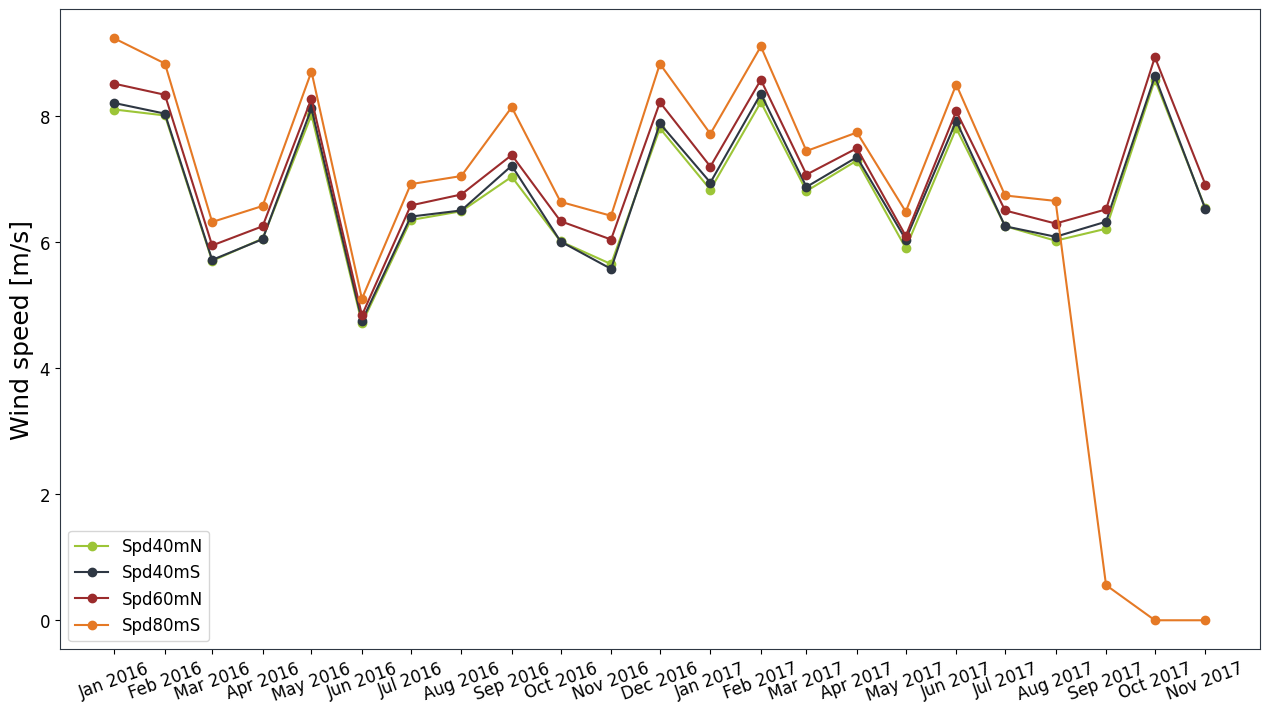

In [20]:
anemometers = ['Spd40mN', 'Spd40mS', 'Spd60mN', 'Spd80mS']
bw.monthly_means(data[anemometers])

### Load and apply cleaning log file

In [21]:
# specify location of associated cleaning file
cleaning_file_path = '..\data\Demo_Station_cleaning_log.csv'
clean_data = bw.apply_cleaning(
    data,
    cleaning_file_path,
    sensor_col_name='MeasurementName',
    date_from_col_name='DateFrom',
    date_to_col_name='DateTo')

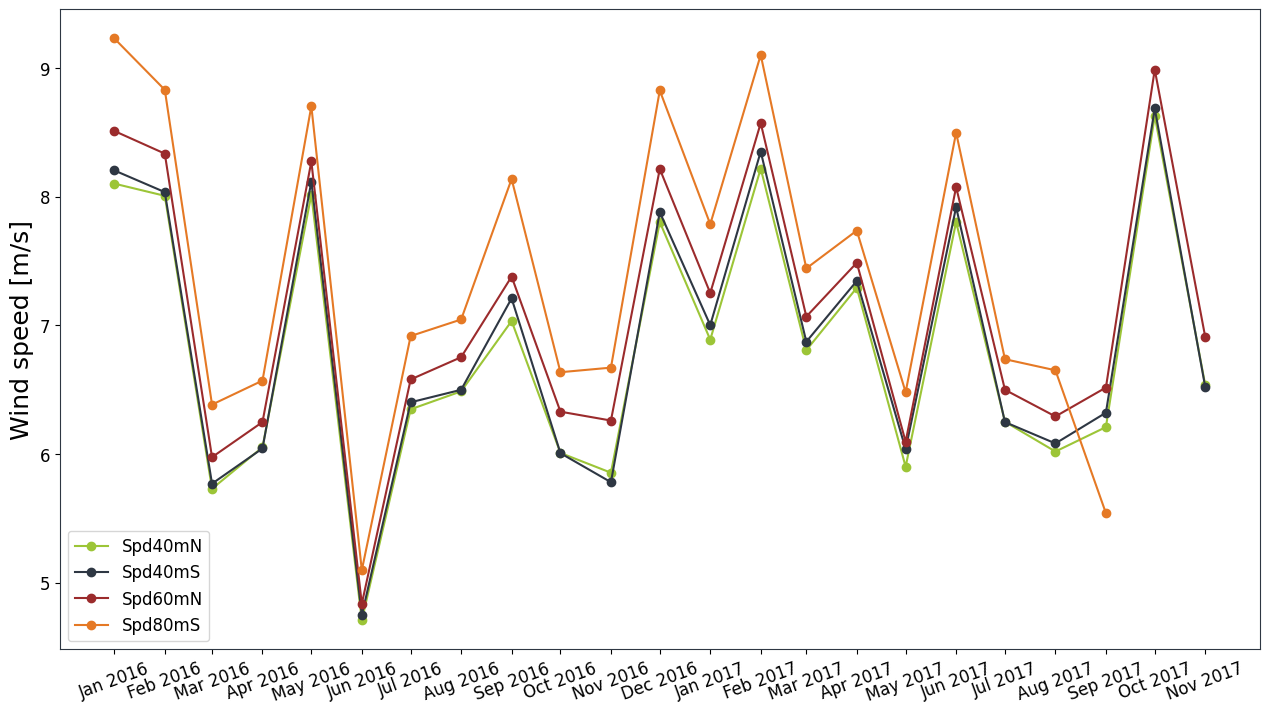

In [22]:
bw.monthly_means(clean_data[anemometers])

### Plot 12 x 24 Heat map

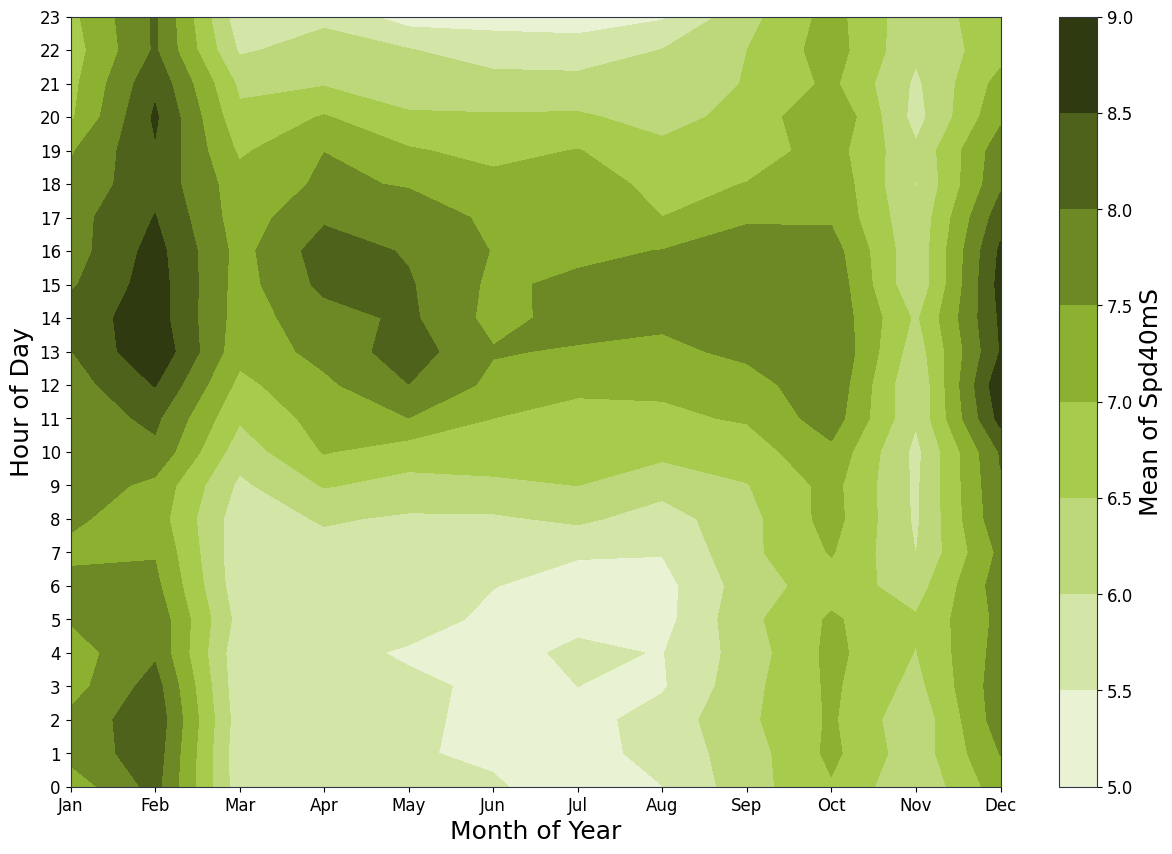

In [23]:
bw.dist_12x24(clean_data.Spd40mS, aggregation_method='mean')

### Plot frequency table

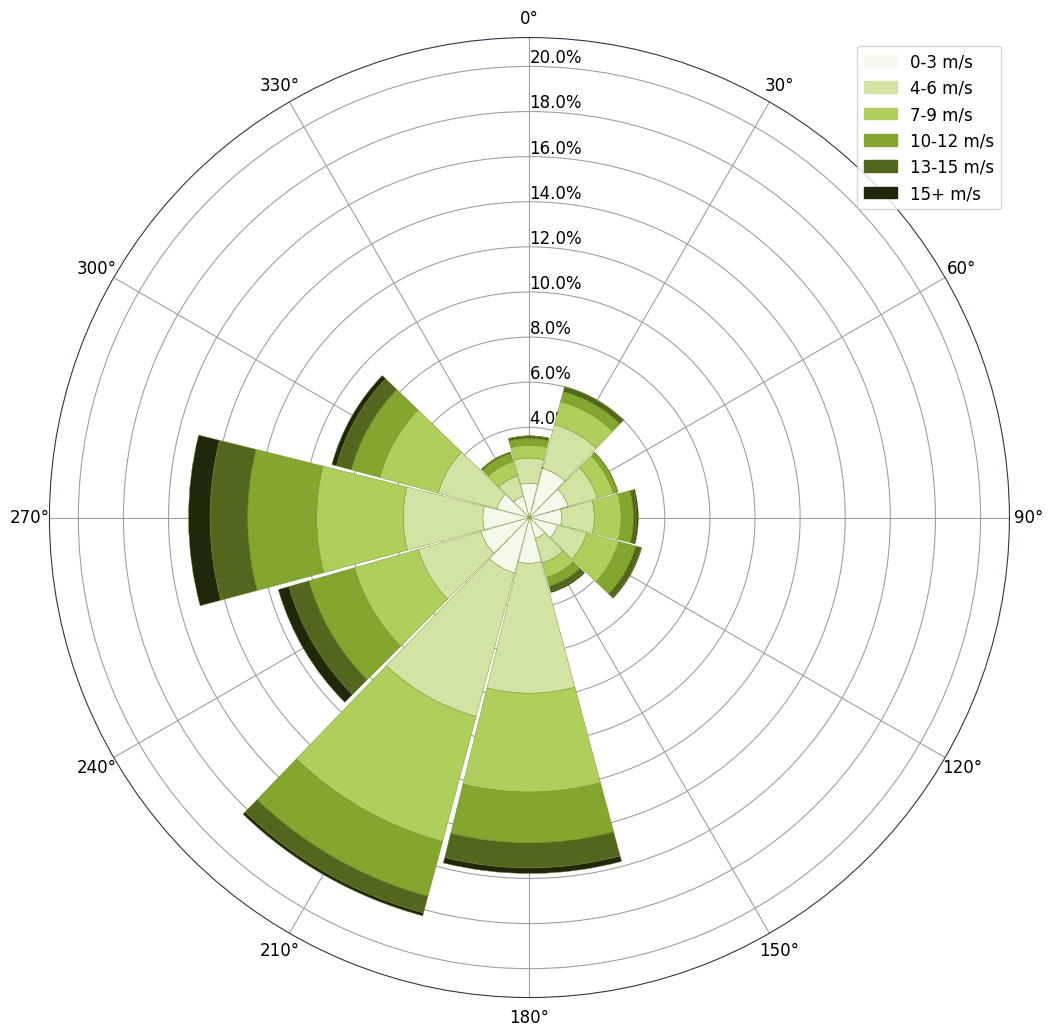

In [31]:
bw.freq_table(data.Spd40mS, data.Dir38mS)

## 4. Import sample reference MERRA-2 reanalysis datasets to use for correlation

In [24]:
# close to dublin
merra2_data =  bw.load_csv("../data/2697_MERRA-2_53.5N_-6.25E_1996-01-01_2023-11-30.csv")
merra2_data

,Spd_50m_mps,Dir_50m_deg,Tmp_2m_degC,Prs_0m_hPa
DateTime,,,,
1996-01-01 00:00:00,9.756,142,7.3,986.10
1996-01-01 01:00:00,9.590,144,7.6,986.22
1996-01-01 02:00:00,9.388,148,7.9,986.54
1996-01-01 03:00:00,9.127,149,7.9,986.60
1996-01-01 04:00:00,9.117,148,7.8,986.54
...,...,...,...,...
2023-11-30 19:00:00,6.942,19,3.3,1002.70
2023-11-30 20:00:00,6.722,17,3.1,1002.87
2023-11-30 21:00:00,6.531,15,2.9,1003.07


## 5. Perform a ordinary least squares correlation for 1 dataset and time period 

In [25]:
# set up correlation
ord_lst_sq = bw.Correl.OrdinaryLeastSquares(merra2_data['Spd_50m_mps'], clean_data['Spd40mS'],
                                            averaging_prd='1M', coverage_threshold=0.90)

{'num_data_points': 20,
 'offset': 1.3230414139350495,
 'r2': 0.6163716377678352,
 'slope': 0.7090320442938393}


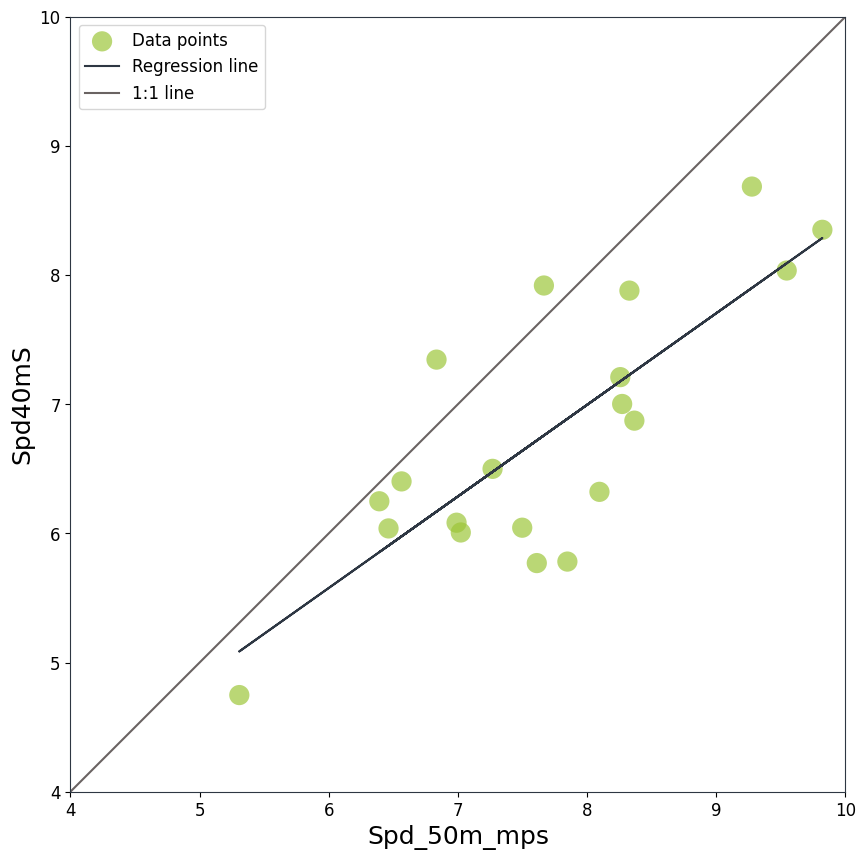

In [26]:
# run correlation
ord_lst_sq.run()
# show plot
ord_lst_sq.plot()

## 6. Apply a long term adjustment to the measured wind speed time series based on the correlation results

In [27]:
# synthesize monthly means over the long term record
long_term_monthly_means = ord_lst_sq.synthesize()
long_term_monthly_means

,Spd40mS_Synthesized
1996-01-01,8.992326
1996-02-01,7.887364
1996-03-01,6.759520
1996-04-01,6.602023
1996-05-01,6.320571
...,...
2023-07-01,6.871717
2023-08-01,6.622638
2023-09-01,6.625676
2023-10-01,6.578583


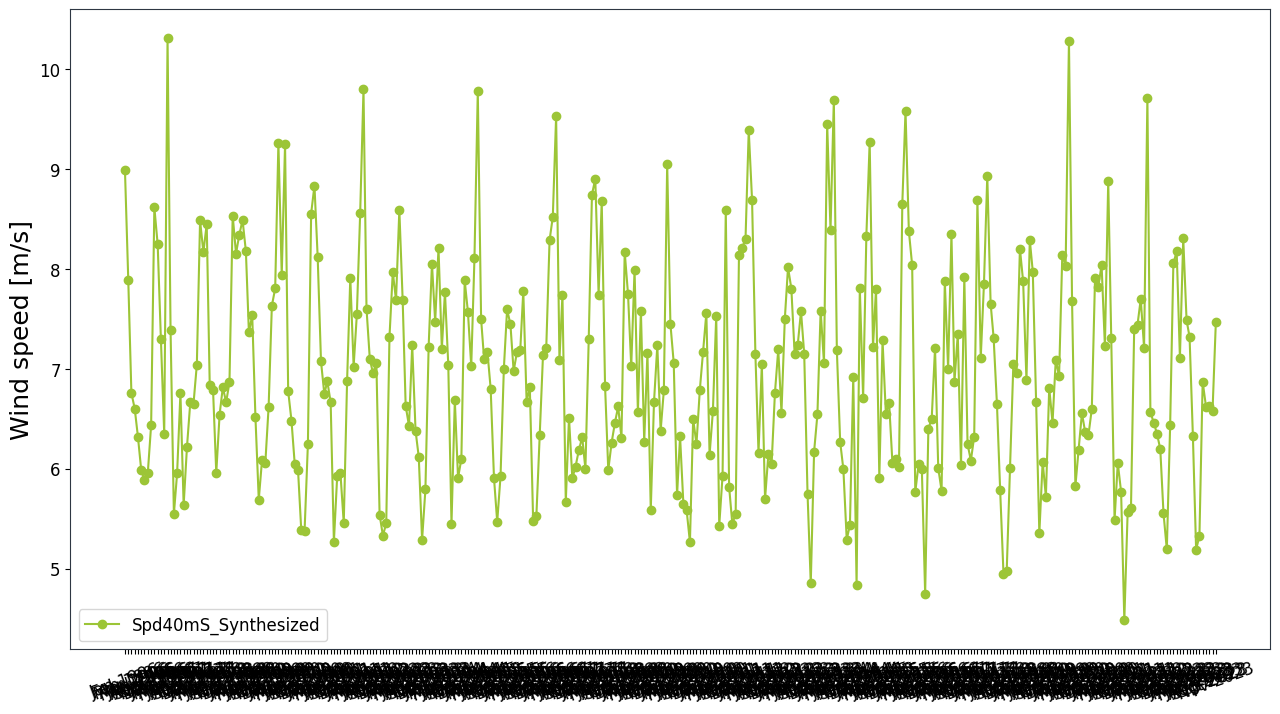

In [28]:
bw.monthly_means(long_term_monthly_means)

In [29]:
# derive long term target mean speed
long_term_target_speed = bw.momm(long_term_monthly_means)
# show the value
long_term_target_speed

6.977748695708737

In [30]:

# derive scale factor as ratio of means
long_term_scale_factor = long_term_target_speed/data.Spd40mS.mean()
# show the value
long_term_scale_factor



1.02612202536322